# PART A

## Importing the necessary requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
##model training
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Reading the Data as DataFrame

In [ ]:

df =pd.read_csv( r"D:\archive\Edge-IIoTset dataset\Selected dataset for ML and DL\ML-EdgeIIoT-dataset.csv")
df.head()

frame.time    ip.src_host ip.dst_host arp.dst.proto_ipv4  arp.opcode  \
0        6.0  192.168.0.152         0.0                0.0         0.0   
1        6.0  192.168.0.101         0.0                0.0         0.0   
2        6.0  192.168.0.152         0.0                0.0         0.0   
3        6.0  192.168.0.101         0.0                0.0         0.0   
4        6.0  192.168.0.152         0.0                0.0         0.0   

   arp.hw.size arp.src.proto_ipv4  icmp.checksum  icmp.seq_le  \
0          0.0                0.0            0.0          0.0   
1          0.0                0.0            0.0          0.0   
2          0.0                0.0            0.0          0.0   
3          0.0                0.0            0.0          0.0   
4          0.0                0.0            0.0          0.0   

   icmp.transmit_timestamp  ...  mqtt.proto_len mqtt.protoname  mqtt.topic  \
0                      0.0  ...             0.0              0           0   
1                      0.0  ...             0.0              0           0   
2                      0.0  ...             0.0              0           0   
3                      0.0  ...             0.0              0           0   
4                      0.0  ...             0.0              0           0   

  mqtt.topic_len mqtt.ver mbtcp.len mbtcp.trans_id mbtcp.unit_id  \
0            0.0      0.0       0.0            0.0           0.0   
1            0.0      0.0       0.0            0.0           0.0   
2            0.0      0.0       0.0            0.0           0.0   
3            0.0      0.0       0.0            0.0           0.0   
4            0.0      0.0       0.0            0.0           0.0   

   Attack_label  Attack_type  
0             1         MITM  
1             1         MITM  
2             1         MITM  
3             1         MITM  
4             1         MITM  

[5 rows x 63 columns]

## Checking The shape of the data

In [3]:
df.shape

(157800, 63)

## Checking the unique and nunique values in each columns

In [4]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

frame.time
['6.0' '0.0' ' 2021 22:14:30.939803000 ' ' 2021 22:14:30.939896000 '
 ' 2021 22:14:31.371846000 ']
155186
ip.src_host
['192.168.0.152' '192.168.0.101' '0' '0.0.0.0' '192.168.0.128']
19090
ip.dst_host
['0.0' '192.168.0.128' '192.168.0.170' '0' '224.0.0.1']
8084
arp.dst.proto_ipv4
['0.0' '0' '192.168.0.128' '192.168.0.170' '192.168.0.1']
9
arp.opcode
[0. 1. 2.]
3
arp.hw.size
[0. 6.]
2
arp.src.proto_ipv4
['0.0' '0' '192.168.0.170' '192.168.0.128' '192.168.0.101']
9
icmp.checksum
[    0. 11938. 13986.  1418.  3466.]
13187
icmp.seq_le
[    0.   256.  8154. 48943. 38596.]
13824
icmp.transmit_timestamp
[       0. 76471910. 76496315. 76514613. 76531277.]
84
icmp.unused
[0.]
1
http.file_data
[0.0 '0.0' '0'
 '<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\\n<html><head>\\n<title>408 Request Timeout</title>\\n</head><body>\\n<h1>Request Timeout</h1>\\n<p>Server timeout waiting for the HTTP request from the client.</p>\\n<hr>\\n<address>Apache/2.4.38 (Raspbian) Server at 127.0.1.1 P

## Checking the data dtypes of the dataset

In [5]:
df.dtypes

frame.time             object
ip.src_host            object
ip.dst_host            object
arp.dst.proto_ipv4     object
arp.opcode            float64
                       ...   
mbtcp.len             float64
mbtcp.trans_id        float64
mbtcp.unit_id         float64
Attack_label            int64
Attack_type            object
Length: 63, dtype: object

## Checking the duplicates in the Dataset

In [6]:
df.duplicated().sum()

814

## Dropping the Duplicates

In [7]:
df=df.drop_duplicates()

## Checking  for missing values

In [8]:
df.isna().sum()

frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
Length: 63, dtype: int64

## Checking the names in the columns

In [9]:
df.columns

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

## Checking the information for the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156986 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 156986 non-null  object 
 1   ip.src_host                156986 non-null  object 
 2   ip.dst_host                156986 non-null  object 
 3   arp.dst.proto_ipv4         156986 non-null  object 
 4   arp.opcode                 156986 non-null  float64
 5   arp.hw.size                156986 non-null  float64
 6   arp.src.proto_ipv4         156986 non-null  object 
 7   icmp.checksum              156986 non-null  float64
 8   icmp.seq_le                156986 non-null  float64
 9   icmp.transmit_timestamp    156986 non-null  float64
 10  icmp.unused                156986 non-null  float64
 11  http.file_data             156986 non-null  object 
 12  http.content_length        156986 non-null  float64
 13  http.request.uri.query     15

## Checking the statistics for dataset

In [11]:
df.describe()

arp.opcode    arp.hw.size  icmp.checksum    icmp.seq_le  \
count  156986.000000  156986.000000  156986.000000  156986.000000   
mean        0.014269       0.060158    3063.092582    3256.779643   
std         0.150167       0.597773   11171.017595   11433.213688   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         2.000000       6.000000   65532.000000   65524.000000   

       icmp.transmit_timestamp  icmp.unused  http.content_length  \
count             1.569860e+05     156986.0        156986.000000   
mean              4.067800e+04          0.0            14.791822   
std               1.768640e+06          0.0           230.251867   
min               0.000000e+00          0.0             0.000000   
25%               0.000000e+00          0.0             0.000000   
50%               0.000000e+00          0.0             0.000000   
75%               0.000000e+00          0.0             0.000000   
max               7.728902e+07          0.0         83655.000000   

       http.response  http.tls_port       tcp.ack  ...       mqtt.len  \
count  156986.000000       156986.0  1.569860e+05  ...  156986.000000   
mean        0.045985            0.0  7.197165e+07  ...       0.421515   
std         0.209453            0.0  3.108831e+08  ...       3.615805   
min         0.000000            0.0  0.000000e+00  ...       0.000000   
25%         0.000000            0.0  0.000000e+00  ...       0.000000   
50%         0.000000            0.0  1.000000e+00  ...       0.000000   
75%         0.000000            0.0  4.790000e+02  ...       0.000000   
max         1.000000            0.0  2.147333e+09  ...      39.000000   

       mqtt.msg_decoded_as   mqtt.msgtype  mqtt.proto_len  mqtt.topic_len  \
count             156986.0  156986.000000   156986.000000   156986.000000   
mean                   0.0       0.162167        0.031850        0.190488   
std                    0.0       1.296749        0.355508        2.129663   
min                    0.0       0.000000        0.000000        0.000000   
25%                    0.0       0.000000        0.000000        0.000000   
50%                    0.0       0.000000        0.000000        0.000000   
75%                    0.0       0.000000        0.000000        0.000000   
max                    0.0      14.000000        4.000000       24.000000   

            mqtt.ver  mbtcp.len  mbtcp.trans_id  mbtcp.unit_id   Attack_label  
count  156986.000000   156986.0        156986.0       156986.0  156986.000000  
mean        0.031850        0.0             0.0            0.0       0.845203  
std         0.355508        0.0             0.0            0.0       0.361712  
min         0.000000        0.0             0.0            0.0       0.000000  
25%         0.000000        0.0             0.0            0.0       1.000000  
50%         0.000000        0.0             0.0            0.0       1.000000  
75%         0.000000        0.0             0.0            0.0       1.000000  
max         4.000000        0.0             0.0            0.0       1.000000  

[8 rows x 43 columns]

## Target Variable Analysis

In [12]:
print(df['Attack_type'].unique())

['MITM' 'Fingerprinting' 'Ransomware' 'Uploading' 'SQL_injection'
 'DDoS_HTTP' 'DDoS_TCP' 'Password' 'Port_Scanning' 'Vulnerability_scanner'
 'Backdoor' 'XSS' 'Normal' 'DDoS_UDP' 'DDoS_ICMP']


In [13]:
df.Attack_label.value_counts(normalize=True)*100

1    84.520276
0    15.479724
Name: Attack_label, dtype: float64

In [14]:

fig = px.pie(df, names='Attack_label', title='Distribution of Attack Labels')
fig.show()

#####  Conclusion: The distribution of target variable is highly imbalanced.This will lead problem in fitting of models.Therefore this problem should be handled.

In [15]:
print(df['Attack_label'].value_counts()) 

1    132685
0     24301
Name: Attack_label, dtype: int64


In [16]:

fig = px.pie(df, names='Attack_type', title='Distribution of Attack Type')
fig.show()

## Dropping off irrevelant columns

In [17]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg", "icmp.unused", "http.tls_port", 'dns.qry.type', 'dns.retransmit_request_in', "mqtt.msg_decoded_as", "mbtcp.trans_id", "mbtcp.unit_id", "http.request.method", "http.referer", "http.request.version", "dns.qry.name.len", "mqtt.conack.flags", "mqtt.protoname", "mqtt.topic"]


df.drop(drop_columns, axis=1, inplace=True)


## Model Training

In [18]:
# Encode categorical labels
le = LabelEncoder()
df['Attack_label'] = le.fit_transform(df['Attack_label'])

In [19]:
# Separate features and target variable
X = df.drop(columns=['Attack_label', 'Attack_type'])  # Features
y = df['Attack_label']  # Target

In [20]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Apply SMOTE for balancing classes
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
# Preprocessing:encoding  of the variable and scailing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

best_model = None
best_score = 0

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Cross-validation score
    scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    print(f"{name} Accuracy: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = name

# Final evaluation using best model
print(f"Best Model: {best_model} with Accuracy: {best_score:.4f}")

# Train best model and evaluate on test set
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', models[best_model])
])
final_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = final_pipeline.predict(X_test)

print("Final Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.9584
Random Forest Accuracy: 0.9445
XGBoost Accuracy: 0.9729
Best Model: XGBoost with Accuracy: 0.9729
Final Model Evaluation on Test Set:
Accuracy: 0.9748710108924136
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      4860
           1       0.97      1.00      0.99     26538

    accuracy                           0.97     31398
   macro avg       0.98      0.92      0.95     31398
weighted avg       0.98      0.97      0.97     31398

Confusion Matrix:
 [[ 4129   731]
 [   58 26480]]


# PART B

Label Flip 5% - Accuracy: 0.9749
False Negative Rate (Missed Attacks): 0.8486
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      4860
           1       0.97      1.00      0.99     26538

    accuracy                           0.97     31398
   macro avg       0.98      0.92      0.95     31398
weighted avg       0.98      0.97      0.97     31398

Confusion Matrix:
 [[ 4124   736]
 [   51 26487]]
--------------------------------------------------------------------------------
Label Flip 10% - Accuracy: 0.9710
False Negative Rate (Missed Attacks): 0.8636
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      4860
           1       0.98      0.99      0.98     26538

    accuracy                           0.97     31398
   macro avg       0.96      0.93      0.94     31398
weighted avg       0.97      0.97      0.97     31398

Confusion 

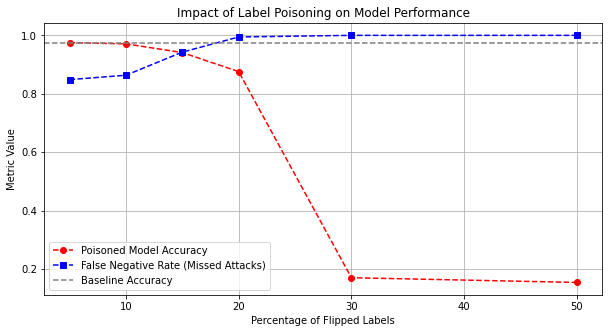

In [ ]:

# Store baseline accuracy (before poisoning)
baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', models[best_model])
])
baseline_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_baseline = baseline_pipeline.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_report = classification_report(y_test, y_pred_baseline, output_dict=True)

# Define label flipping percentages
flip_percentages = [5, 10, 15, 20, 30, 50]
accuracy_results = []
false_negative_rates = []

unique_labels = np.unique(y_train_resampled)

# Identify attack vs. normal labels
normal_label = 0  
attack_labels = [lbl for lbl in unique_labels if lbl != normal_label]

for flip in flip_percentages:
    np.random.seed(42)  # Ensure reproducibility

    # Determine number of samples to flip
    n_samples = int(len(y_train_resampled) * flip / 100)

    # **Targeted Poisoning Strategy: Flip more attack labels to normal**
    attack_indices = y_train_resampled[y_train_resampled.isin(attack_labels)].index
    normal_indices = y_train_resampled[y_train_resampled == normal_label].index

    flip_attack_samples = min(n_samples, len(attack_indices)) 
    flip_normal_samples = n_samples - flip_attack_samples 

    # Select random indices to flip
    attack_flip_indices = np.random.choice(attack_indices, size=flip_attack_samples, replace=False)
    normal_flip_indices = np.random.choice(normal_indices, size=flip_normal_samples, replace=False)

    indices = np.concatenate([attack_flip_indices, normal_flip_indices])

    # Copy labels and flip them
    y_train_flipped = y_train_resampled.copy()
    
    for idx in attack_flip_indices:
        y_train_flipped.loc[idx] = normal_label  # Flip attack → normal

    for idx in normal_flip_indices:
        y_train_flipped.loc[idx] = np.random.choice(attack_labels)  # Flip normal → attack

    # Train model with poisoned data
    poisoned_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', models[best_model])
    ])
    poisoned_pipeline.fit(X_train_resampled, y_train_flipped)
    y_pred_poisoned = poisoned_pipeline.predict(X_test)

    # Evaluate accuracy
    acc = accuracy_score(y_test, y_pred_poisoned)
    accuracy_results.append(acc)

    # Calculate False Negative Rate -how many attacks were misclassified as normal
    poisoned_report = classification_report(y_test, y_pred_poisoned, output_dict=True)
    fnr = poisoned_report[str(normal_label)]['recall'] 
    false_negative_rates.append(fnr)

    print(f"Label Flip {flip}% - Accuracy: {acc:.4f}")
    print(f"False Negative Rate (Missed Attacks): {fnr:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_poisoned))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poisoned))
    print("-" * 80)

# Plot accuracy and false negative rate degradation
plt.figure(figsize=(10, 5))
plt.plot(flip_percentages, accuracy_results, 'r--o', label="Poisoned Model Accuracy")
plt.plot(flip_percentages, false_negative_rates, 'b--s', label="False Negative Rate (Missed Attacks)")
plt.axhline(baseline_accuracy, color='gray', linestyle='--', label="Baseline Accuracy")
plt.xlabel("Percentage of Flipped Labels")
plt.ylabel("Metric Value")
plt.title("Impact of Label Poisoning on Model Performance")
plt.legend()
plt.grid()
plt.show()


Insights
- Poisoning the dataset severely impacts model reliability.
- After 30% label flipping, the model fails to detect attacks, leading to a dangerous security loophole.
- False negatives rise significantly, indicating that more attacks go undetected.